# AIN427 - Data Mining Course Project
# Student Name: Emirhan Utku , Student ID: 2210765029
# Student Name: Süleyman Yolcu , Student ID: 2210765016
# Date: December 23 , 2024
---


# 0. LIBRARIES & INITIAL SETUP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate, KFold
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

# Feature selection
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold, RFE

# Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier

# Regression models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, 
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    mean_squared_error, mean_absolute_error, r2_score
)

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')


# 1. DATA LOADING

In [2]:
print("Loading data...")
data = pd.read_csv('Challenger_Ranked_Games_15minute.csv')
print("Data loaded. Shape:", data.shape)

Loading data...
Data loaded. Shape: (26834, 51)


# 2. QUICK DATA INSPECTION

In [3]:
print("\n--- HEAD of DATA ---")
display(data.head())


--- HEAD of DATA ---


,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,4247263043,0,24081,1190,44,8.8,309,74,0,8,...,['MID_LANE'],2,1,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,1
1,4247155821,1,24162,2212,46,9.2,393,64,0,5,...,['TOP_LANE'],1,0,1,0,0,0,[],0,0
2,4243963257,0,22413,1563,41,8.2,300,62,0,5,...,['BOT_LANE'],4,2,1,1,0,1,"['FIRE_DRAGON', 'EARTH_DRAGON']",2,1
3,4241678498,0,23837,3197,46,9.2,370,96,0,6,...,['TOP_LANE'],1,0,1,0,0,0,[],0,1
4,4241538868,1,27688,3663,44,8.8,381,66,0,9,...,['BOT_LANE'],2,1,0,1,0,0,[],0,0


In [4]:
print("\n--- DESCRIBE DATA ---")
display(data.describe())


--- DESCRIBE DATA ---


,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTower,redFirstInhibitor,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragon,redRiftHeralds
count,2.683400e+04,26834.000000,26834.000000,26834.000000,26834.000000,26834.000000,26834.000000,26834.000000,26834.0,26834.000000,...,26834.000000,26834.000000,26834.000000,26834.000000,26834.000000,26834.000000,26834.000000,26834.000000,26834.000000,26834.000000
mean,4.171924e+09,0.500186,28498.258068,3478.691362,47.734740,9.546948,331.185436,71.557017,0.0,13.181374,...,0.515465,0.053961,1.331296,0.480957,0.409741,0.440598,0.063911,0.497689,0.789893,0.330178
std,7.479180e+07,0.500009,7946.940493,1576.997934,8.582599,1.716520,70.619261,26.670098,0.0,9.006977,...,0.499770,0.225946,1.402980,0.920432,0.595949,0.586428,0.271464,0.500004,0.751932,0.472815
min,3.482433e+09,0.000000,3627.000000,-4756.000000,5.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.142427e+09,0.000000,24759.250000,2375.000000,45.000000,9.000000,316.000000,64.000000,0.0,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.190650e+09,1.000000,26827.500000,3212.000000,46.000000,9.200000,349.000000,76.000000,0.0,11.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.219630e+09,1.000000,29435.000000,4298.000000,48.000000,9.600000,374.000000,87.000000,0.0,16.000000,...,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,4.261026e+09,1.000000,80503.000000,16905.000000,80.000000,16.000000,463.000000,210.000000,0.0,92.000000,...,1.000000,1.000000,11.000000,5.000000,4.000000,4.000000,3.000000,1.000000,4.000000,2.000000


In [5]:
print("\n--- INFO DATA ---")
data.info()


--- INFO DATA ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26834 entries, 0 to 26833
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gameId                      26834 non-null  int64  
 1   blueWins                    26834 non-null  int64  
 2   blueTotalGolds              26834 non-null  int64  
 3   blueCurrentGolds            26834 non-null  int64  
 4   blueTotalLevel              26834 non-null  int64  
 5   blueAvgLevel                26834 non-null  float64
 6   blueTotalMinionKills        26834 non-null  int64  
 7   blueTotalJungleMinionKills  26834 non-null  int64  
 8   blueFirstBlood              26834 non-null  int64  
 9   blueKill                    26834 non-null  int64  
 10  blueDeath                   26834 non-null  int64  
 11  blueAssist                  26834 non-null  int64  
 12  blueWardPlaced              26834 non-null  int64  
 13  blueWardKill

# 3. SPLIT DATA INTO BLUE & RED

In [6]:
# We keep the existing approach of separating into blue_data and red_data
blue_columns = ['gameId'] + [col for col in data.columns if col.startswith('blue')]
blue_data = data[blue_columns]

red_columns = ['gameId'] + [col for col in data.columns if col.startswith('red')]
red_data = data[red_columns]

# Drop some columns not needed
blue_columns_to_drop = ['blueDragnoType', 'blueFirstTowerLane','blueFirstBlood']  
red_columns_to_drop = ['redDragnoType', 'redFirstTowerLane','redFirstBlood']  

blue_data = blue_data.drop(columns=blue_columns_to_drop)
red_data  = red_data.drop(columns=red_columns_to_drop)

# 4. EXPLORATORY DATA ANALYSIS (CORRELATIONS, DISTRIBUTIONS)

In [7]:
print("\n--- BLUE CORRELATION with 'blueWins' ---")
blue_correlation_matrix = blue_data.corr()
sorted_correlations_blue = blue_correlation_matrix['blueWins'].sort_values(ascending=False)
print(sorted_correlations_blue)



--- BLUE CORRELATION with 'blueWins' ---
blueWins                      1.000000
blueTowerKills                0.378512
blueFirstTower                0.347103
blueDragon                    0.324633
blueKill                      0.279008
blueMidTowerKills             0.277362
blueBotTowerKills             0.274001
blueFirstDragon               0.262592
blueCurrentGolds              0.261419
blueTotalGolds                0.224901
blueRiftHeralds               0.212824
blueTopTowerKills             0.204657
blueAssist                    0.181491
blueTotalLevel                0.161834
blueAvgLevel                  0.161834
blueTotalMinionKills          0.160471
blueFirstInhibitor            0.159124
blueInhibitor                 0.150441
blueTotalJungleMinionKills    0.137586
blueWardKills                 0.074630
blueWardPlaced                0.037053
gameId                       -0.005474
blueDeath                    -0.257305
Name: blueWins, dtype: float64


In [8]:
print("\n--- RED CORRELATION with 'redWins' ---")
red_correlation_matrix = red_data.corr()
sorted_correlations_red = red_correlation_matrix['redWins'].sort_values(ascending=False)
print(sorted_correlations_red)


--- RED CORRELATION with 'redWins' ---
redWins                      1.000000
redFirstTower                0.331914
redDragon                    0.328984
redTowerKills                0.323409
redFirstDragon               0.263398
redKill                      0.257305
redCurrentGolds              0.253267
redBotTowerKills             0.235856
redMidTowerKills             0.226201
redRiftHeralds               0.218904
redTotalGolds                0.201344
redTopTowerKills             0.179915
redAssist                    0.157069
redTotalMinionKills          0.156655
redTotalJungleMinionKills    0.155438
redFirstInhibitor            0.135008
redAvgLevel                  0.130478
redTotalLevel                0.130478
redInhibitor                 0.127347
redWardKills                 0.079818
redWardPlaced                0.043594
gameId                       0.005474
redDeath                    -0.279008
Name: redWins, dtype: float64


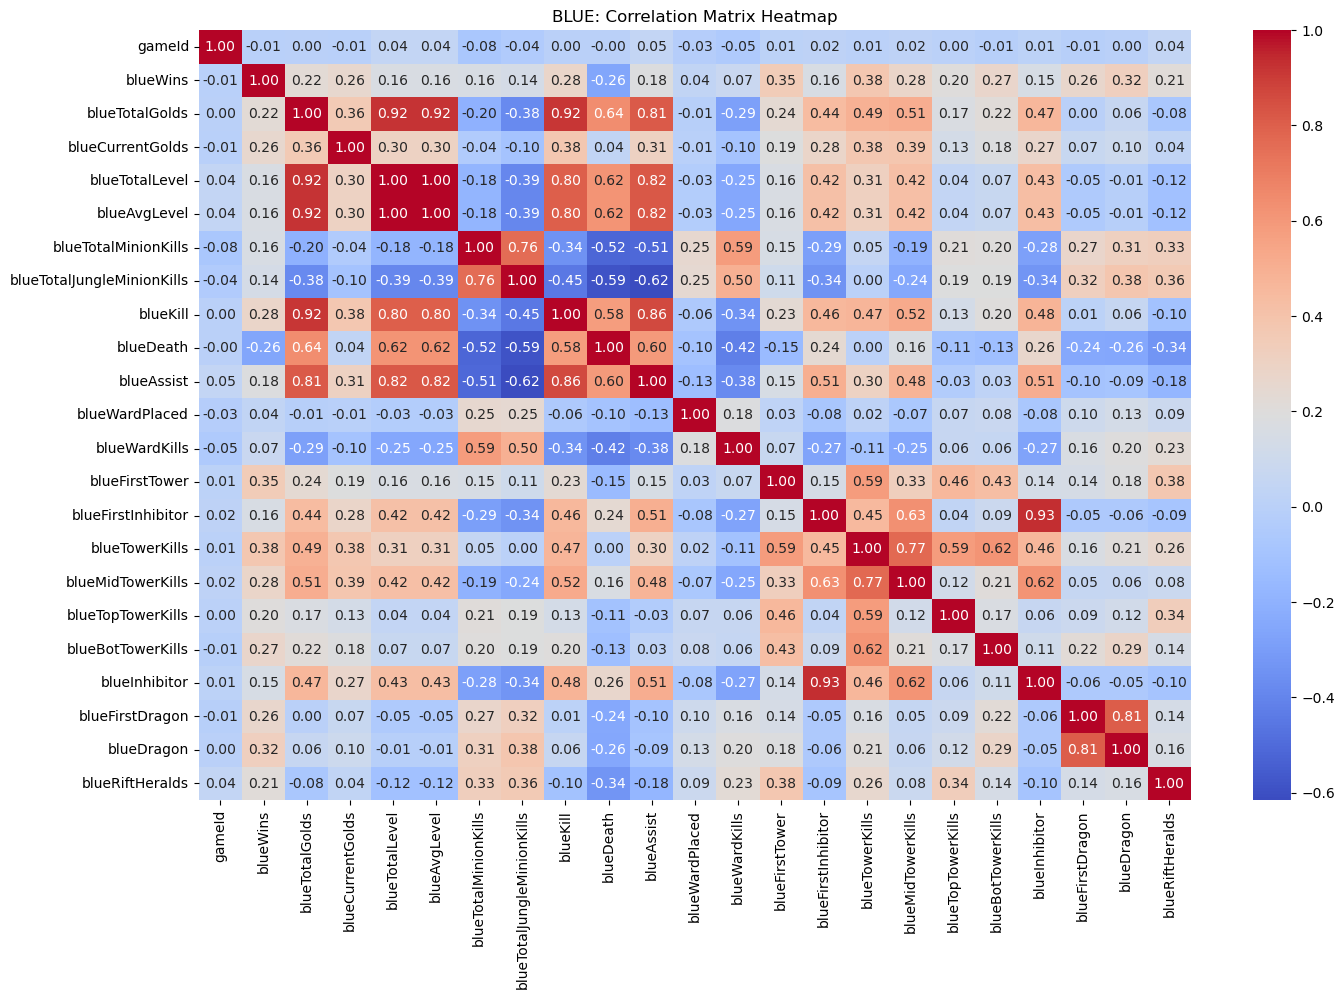

In [9]:
plt.figure(figsize=(16, 10))
sns.heatmap(blue_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('BLUE: Correlation Matrix Heatmap')
plt.show()

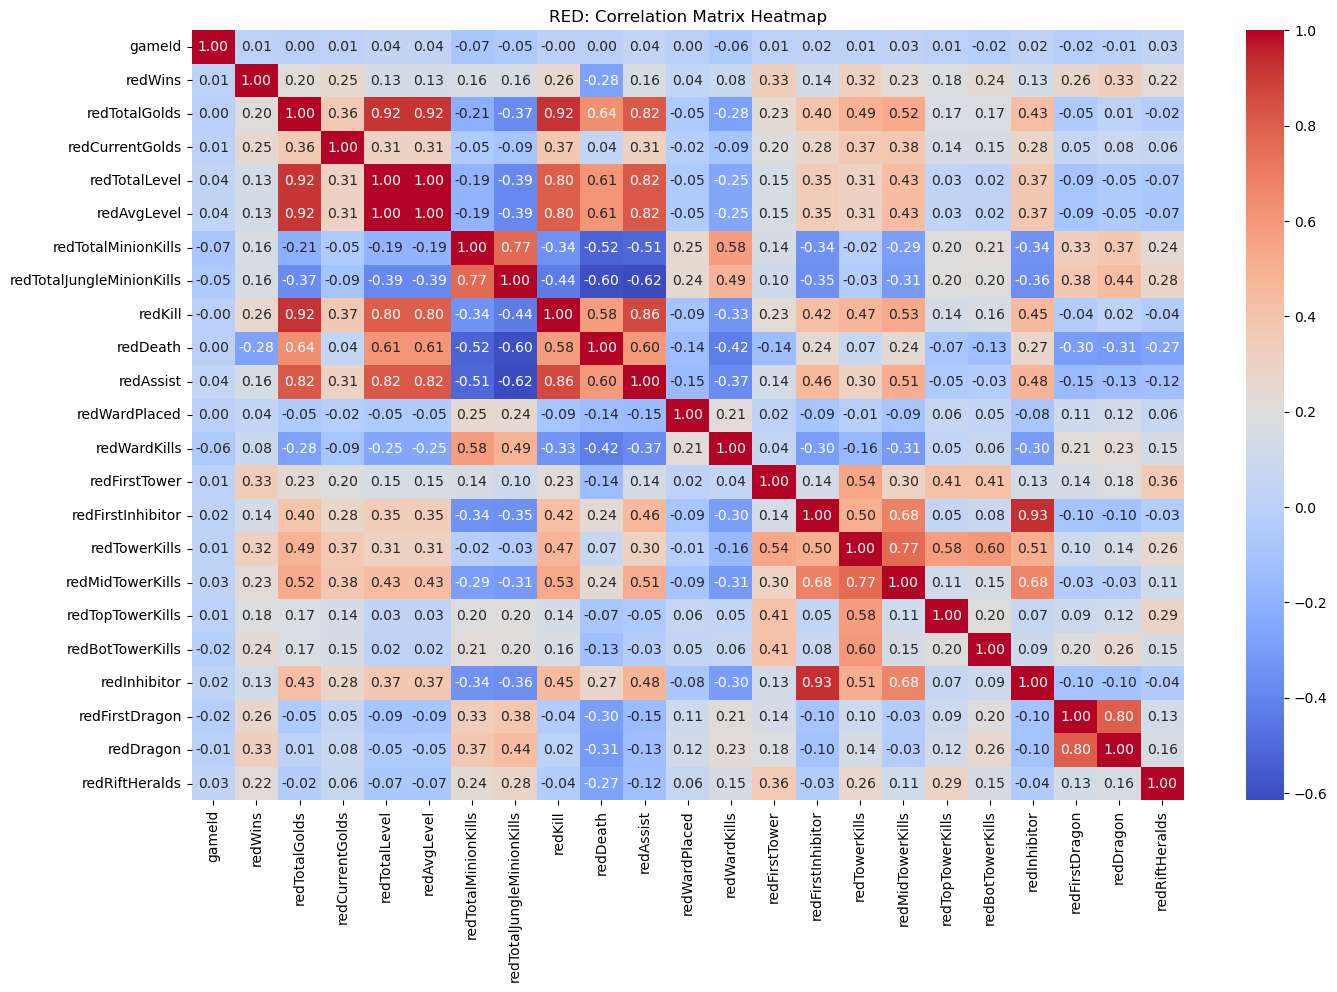

In [10]:
plt.figure(figsize=(16, 10))
sns.heatmap(red_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('RED: Correlation Matrix Heatmap')
plt.show()

### Insights from Heatmaps and Correlation Analysis

- The **heatmaps** and **correlation lists** reveal that **tower kills**, **dragons**, and **kills** have a **relatively high correlation with winning**. This observation aligns with general **League of Legends knowledge**, where securing key objectives and accumulating kills significantly increase the likelihood of victory.  

- Interestingly, **gold (both current and total)** shows a **moderate correlation** with winning. While gold remains an essential resource, this suggests that **factors like tower control and early objective captures** also play a substantial role in determining outcomes.  

- Additionally, the **negative correlation of deaths with winning** is intuitive—**higher team deaths** typically reduce the odds of securing victory.  

- These correlation insights were instrumental in **guiding feature selection** and motivated the **removal of less impactful features**, ensuring a more focused and effective analysis.


# 5. DISTRIBUTION PLOTS

In [11]:
def plot_feature_distributions(dataframe, exclude_column='gameId'):
    columns_to_plot = [col for col in dataframe.columns if col != exclude_column]
    num_features = len(columns_to_plot)
    num_rows, num_cols = 5, 5  # Adjust for 25 subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    axes = axes.flatten()

    for i, col in enumerate(columns_to_plot):
        if i >= len(axes):
            break
        ax = axes[i]
        ax.hist(dataframe[col], bins=30, edgecolor='k', alpha=0.7)
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
    
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()




--- BLUE FEATURE DISTRIBUTIONS ---


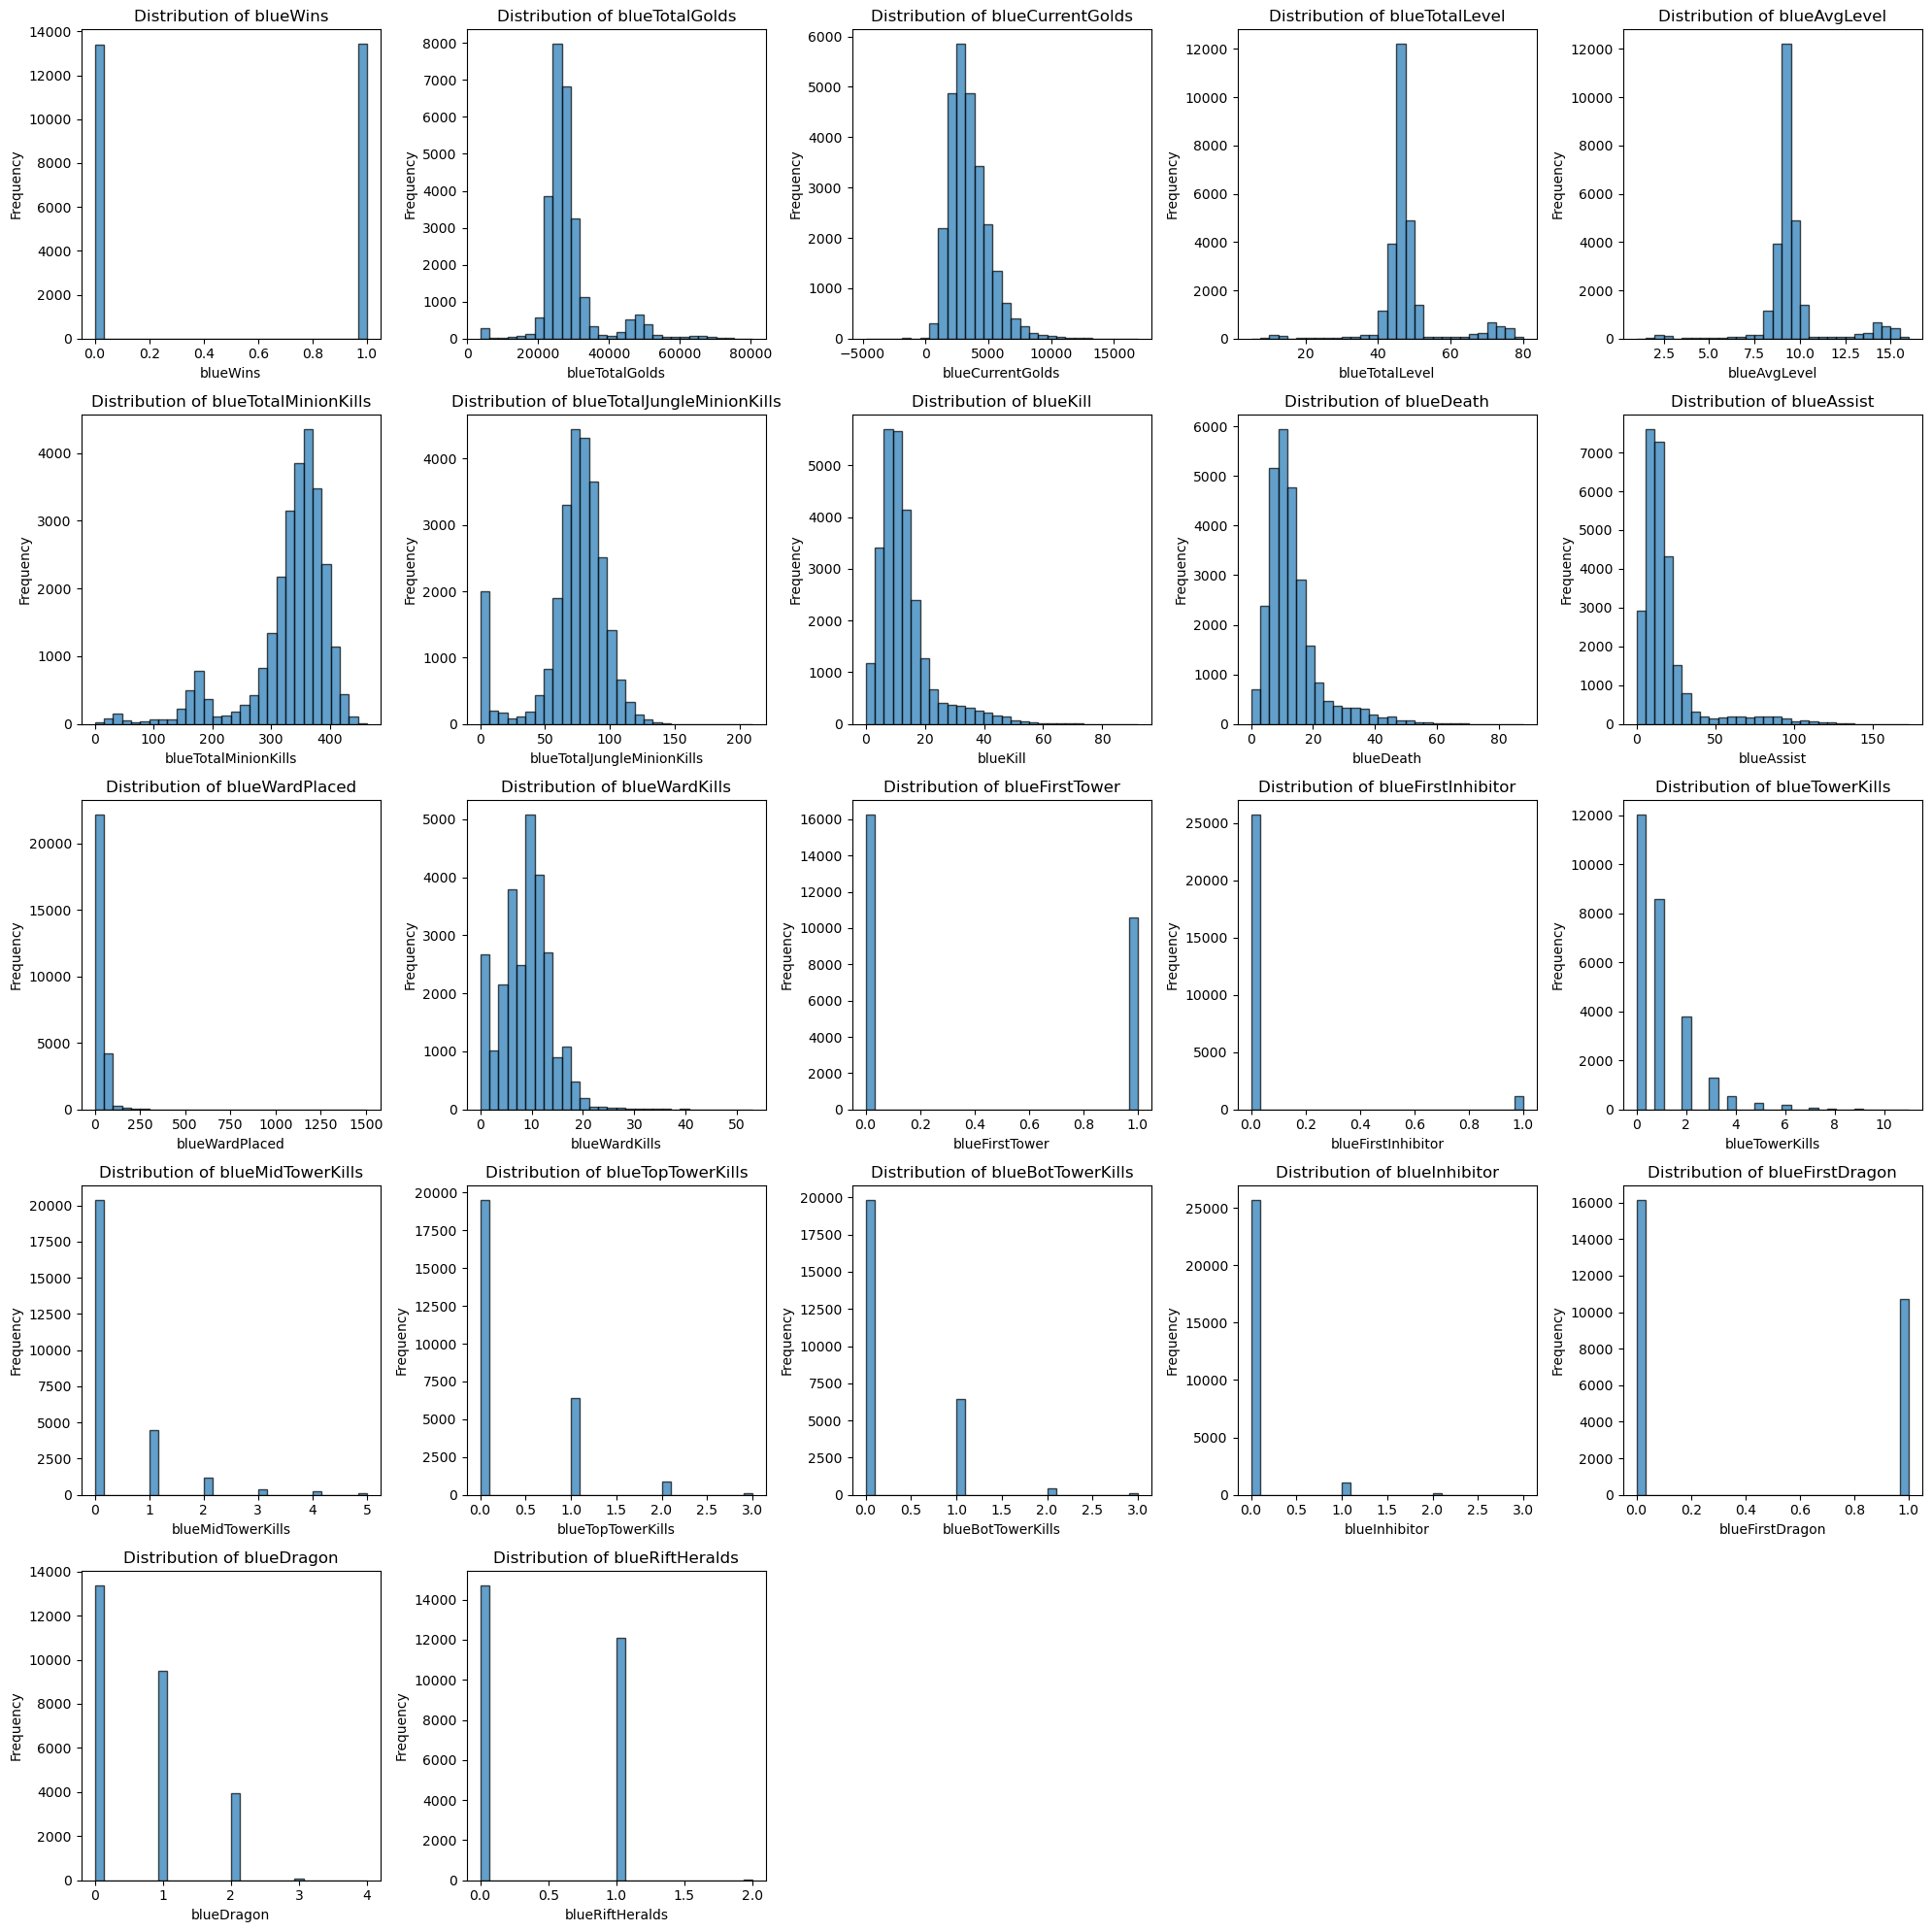

In [12]:
print("\n--- BLUE FEATURE DISTRIBUTIONS ---")
plot_feature_distributions(blue_data)


--- RED FEATURE DISTRIBUTIONS ---


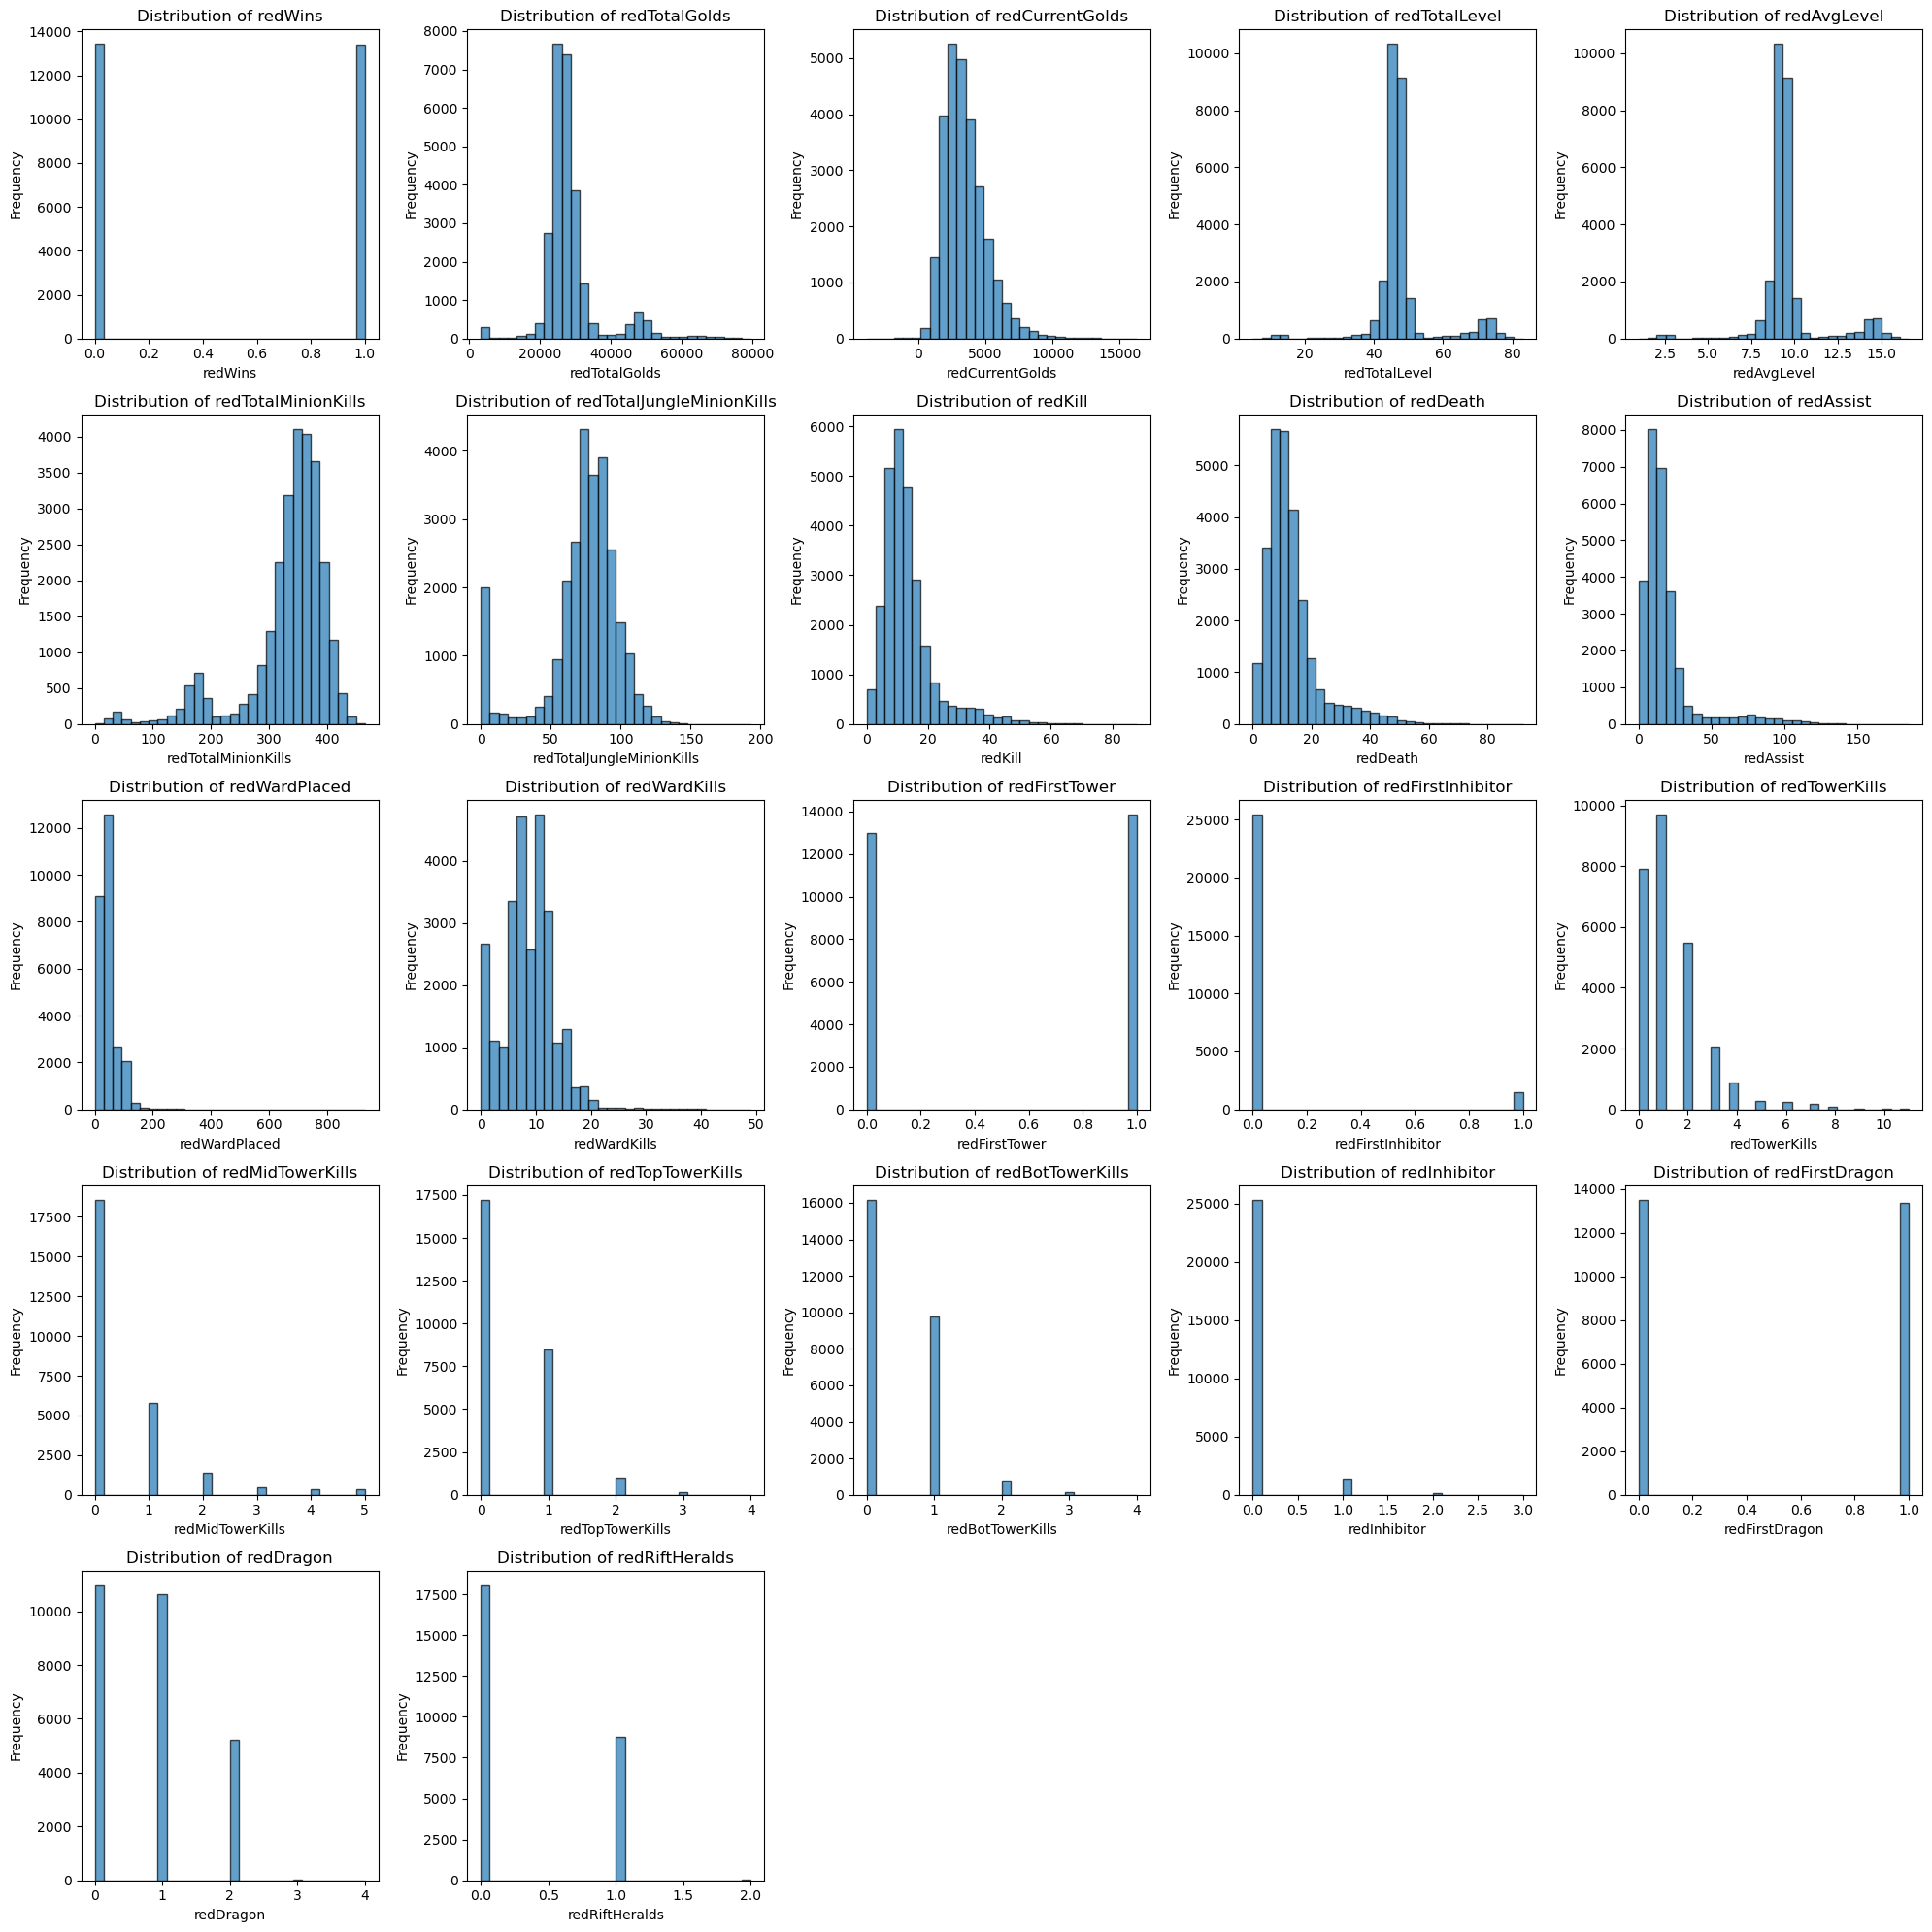

In [13]:
print("\n--- RED FEATURE DISTRIBUTIONS ---")
plot_feature_distributions(red_data)

### Analysis of Feature Distributions in League of Legends Data

- The distribution plots for both **blue** and **red** team features reveal that many numerical variables (e.g., **total gold**, **kills**, **deaths**) exhibit a **right-skewed pattern**. Most values cluster in the **lower ranges**, while a few extend into significantly higher values.  

- This skewness aligns with typical **League of Legends gameplay**, where certain matches **snowball harder**, leading to exceptionally high gold or kill counts for a smaller subset of games.  

- In addition, some **categorical or binary variables** (e.g., **firstTower**, **firstInhibitor**) display a predominance of **0s**—indicating these objectives were not secured early in most games—while **1s** are less frequent, reflecting that not every team achieves these milestones quickly.  

- Overall, these distributions highlight a **diverse dataset**, capturing both **shorter, fast-paced games** and **longer, drawn-out matches** with higher kill and gold counts.


# 6. DATA CLEANING (handle negative gold, scaling, new features)

In [14]:
# Handle negative gold values by replacing with mean of non-negative
non_negative_mean_blue = blue_data[blue_data['blueCurrentGolds'] >= 0]['blueCurrentGolds'].mean()
blue_data['blueCurrentGolds'] = blue_data['blueCurrentGolds'].apply(lambda x: non_negative_mean_blue if x < 0 else x)

In [15]:
non_negative_mean_red = red_data[red_data['redCurrentGolds'] >= 0]['redCurrentGolds'].mean()
red_data['red_CurrentGolds'] = red_data['redCurrentGolds'].apply(lambda x: non_negative_mean_red if x < 0 else x)


In [16]:
# Scale data
scaler = MinMaxScaler()
blue_data.iloc[:, 1:] = scaler.fit_transform(blue_data.iloc[:, 1:])
red_data.iloc[:, 1:]  = scaler.fit_transform(red_data.iloc[:, 1:])

## 6.A ADDITIONAL FEATURE ENGINEERING (Example for Blue Data)

In [17]:
print("\n--- Additional Feature Engineering for Blue Data ---")
blue_data['blue_ObjectiveControlScore'] = (
    blue_data['blueTowerKills'] 
    + blue_data['blueFirstTower'] 
    + blue_data['blueDragon'] 
    + blue_data['blueInhibitor']
)
blue_data['blue_GoldEfficiency'] = blue_data['blueTotalGolds'] / (blue_data['blueKill'] + 1)

# New features: (Gold per Minute), (K/D ratio), (Ward Efficiency)
# Assuming the snapshot is at ~15 minutes
blue_data["blueGoldPerMin"] = blue_data["blueTotalGolds"] / 15.0
blue_data["blueKDRatio"] = blue_data.apply(
    lambda row: row["blueKill"] / row["blueDeath"] if row["blueDeath"] != 0 else row["blueKill"],
    axis=1
)
blue_data["blueWardEfficiency"] = blue_data.apply(
    lambda row: row["blueWardKills"] / row["blueWardPlaced"] if row["blueWardPlaced"] != 0 else 0,
    axis=1
)

print("Done feature engineering for blue side. Sample columns:\n", blue_data.columns)


--- Additional Feature Engineering for Blue Data ---
Done feature engineering for blue side. Sample columns:
 Index(['gameId', 'blueWins', 'blueTotalGolds', 'blueCurrentGolds',
       'blueTotalLevel', 'blueAvgLevel', 'blueTotalMinionKills',
       'blueTotalJungleMinionKills', 'blueKill', 'blueDeath', 'blueAssist',
       'blueWardPlaced', 'blueWardKills', 'blueFirstTower',
       'blueFirstInhibitor', 'blueTowerKills', 'blueMidTowerKills',
       'blueTopTowerKills', 'blueBotTowerKills', 'blueInhibitor',
       'blueFirstDragon', 'blueDragon', 'blueRiftHeralds',
       'blue_ObjectiveControlScore', 'blue_GoldEfficiency', 'blueGoldPerMin',
       'blueKDRatio', 'blueWardEfficiency'],
      dtype='object')


In [18]:
print("\n--- Additional Feature Engineering for Red Data ---")
red_data['red_ObjectiveControlScore'] = (
    red_data['redTowerKills'] 
    + red_data['redFirstTower'] 
    + red_data['redDragon'] 
    + red_data['redInhibitor']
)
red_data['red_GoldEfficiency'] = red_data['redTotalGolds'] / (red_data['redKill'] + 1)

# New features: (Gold per Minute), (K/D ratio), (Ward Efficiency)
# Assuming the snapshot is at ~15 minutes
red_data["redGoldPerMin"] = red_data["redTotalGolds"] / 15.0
red_data["redKDRatio"] = red_data.apply(
    lambda row: row["redKill"] / row["redDeath"] if row["redDeath"] != 0 else row["redKill"],
    axis=1
)
red_data["redWardEfficiency"] = red_data.apply(
    lambda row: row["redWardKills"] / row["redWardPlaced"] if row["redWardPlaced"] != 0 else 0,
    axis=1
)

print("Done feature engineering for red side. Sample columns:\n", red_data.columns)



--- Additional Feature Engineering for Red Data ---
Done feature engineering for red side. Sample columns:
 Index(['gameId', 'redWins', 'redTotalGolds', 'redCurrentGolds',
       'redTotalLevel', 'redAvgLevel', 'redTotalMinionKills',
       'redTotalJungleMinionKills', 'redKill', 'redDeath', 'redAssist',
       'redWardPlaced', 'redWardKills', 'redFirstTower', 'redFirstInhibitor',
       'redTowerKills', 'redMidTowerKills', 'redTopTowerKills',
       'redBotTowerKills', 'redInhibitor', 'redFirstDragon', 'redDragon',
       'redRiftHeralds', 'red_CurrentGolds', 'red_ObjectiveControlScore',
       'red_GoldEfficiency', 'redGoldPerMin', 'redKDRatio',
       'redWardEfficiency'],
      dtype='object')


# 7. FEATURE IMPORTANCE (RandomForest), TRAIN-VAL SPLIT

In [19]:
print("\n--- Splitting Data, Checking Feature Importances ---")

# Separate features & targets for BLUE
blue_X = blue_data.drop(columns=['gameId', 'blueWins'])
blue_y = blue_data['blueWins']

# For RED
red_X = red_data.drop(columns=['gameId', 'redWins'])
red_y = red_data['redWins']

# Train/Test split
blue_X_train, blue_X_val, blue_y_train, blue_y_val = train_test_split(
    blue_X, blue_y, test_size=0.2, random_state=42
)
red_X_train, red_X_val, red_y_train, red_y_val = train_test_split(
    red_X, red_y, test_size=0.2, random_state=42
)

# Random Forest for Feature Importances
blue_rf = RandomForestClassifier(random_state=42)
blue_rf.fit(blue_X_train, blue_y_train)
blue_rf_importances = blue_rf.feature_importances_

red_rf = RandomForestClassifier(random_state=42)
red_rf.fit(red_X_train, red_y_train)
red_rf_importances = red_rf.feature_importances_

blue_feature_scores = pd.DataFrame({
    'Feature': blue_X_train.columns,
    'RandomForestImportance': blue_rf_importances
}).sort_values(by='RandomForestImportance', ascending=False)

red_feature_scores = pd.DataFrame({
    'Feature': red_X_train.columns,
    'RandomForestImportance': red_rf_importances
}).sort_values(by='RandomForestImportance', ascending=False)

print("\n--- Top Features (BLUE) ---")
display(blue_feature_scores.head(10))

print("\n--- Top Features (RED) ---")
display(red_feature_scores.head(10))


--- Splitting Data, Checking Feature Importances ---

--- Top Features (BLUE) ---


,Feature,RandomForestImportance
24,blueKDRatio,0.161556
22,blue_GoldEfficiency,0.096186
23,blueGoldPerMin,0.094232
0,blueTotalGolds,0.089067
7,blueDeath,0.061633
1,blueCurrentGolds,0.050172
4,blueTotalMinionKills,0.048364
21,blue_ObjectiveControlScore,0.042592
25,blueWardEfficiency,0.040090
5,blueTotalJungleMinionKills,0.039408



--- Top Features (RED) ---


,Feature,RandomForestImportance
25,redKDRatio,0.155347
23,red_GoldEfficiency,0.093328
0,redTotalGolds,0.088096
24,redGoldPerMin,0.087420
7,redDeath,0.067365
4,redTotalMinionKills,0.044170
21,red_CurrentGolds,0.042025
22,red_ObjectiveControlScore,0.041562
1,redCurrentGolds,0.040901
26,redWardEfficiency,0.036946


# 8. CLASSIFICATION (With Random Forest, XGB, etc.)

In [20]:
# Select top 10 features (example) for both teams
blue_top_features = blue_feature_scores.nlargest(10, 'RandomForestImportance')['Feature'].tolist()
red_top_features  = red_feature_scores.nlargest(10, 'RandomForestImportance')['Feature'].tolist()

blue_X_train_selected = blue_X_train[blue_top_features]
blue_X_val_selected   = blue_X_val[blue_top_features]

red_X_train_selected = red_X_train[red_top_features]
red_X_val_selected   = red_X_val[red_top_features]

# Random Forest on selected features
blue_model = RandomForestClassifier(random_state=42)
blue_model.fit(blue_X_train_selected, blue_y_train)
blue_predictions = blue_model.predict(blue_X_val_selected)

red_model = RandomForestClassifier(random_state=42)
red_model.fit(red_X_train_selected, red_y_train)
red_predictions = red_model.predict(red_X_val_selected)

print("\n--- Classification Reports (RandomForest w/ Top Features) ---")
print("BLUE:\n", classification_report(blue_y_val, blue_predictions))
print("RED:\n", classification_report(red_y_val, red_predictions))


--- Classification Reports (RandomForest w/ Top Features) ---
BLUE:
               precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      2641
         1.0       0.79      0.79      0.79      2726

    accuracy                           0.79      5367
   macro avg       0.79      0.79      0.79      5367
weighted avg       0.79      0.79      0.79      5367

RED:
               precision    recall  f1-score   support

         0.0       0.79      0.80      0.80      2726
         1.0       0.79      0.78      0.79      2641

    accuracy                           0.79      5367
   macro avg       0.79      0.79      0.79      5367
weighted avg       0.79      0.79      0.79      5367



### Random Forest with Top Features

- Using the **top 10 features** selected based on **Random Forest's feature importance**, the model achieves an **accuracy of approximately 79%** for both **blue** and **red side predictions**.  

- The balanced **precision** and **recall** scores (~0.79–0.80) indicate that the model effectively classifies **wins vs. losses** without exhibiting significant bias towards one class.  

- Notably, even with a **small subset of key features**—such as **kills**, **gold**, and **tower kills**—the model maintains **strong predictive performance**. This suggests that these critical metrics capture much of the **early-game success dynamics** in **League of Legends**.


## 8.A XGBoost (with polynomial features) + GridSearch

In [21]:
print("\n--- XGBoost with Polynomial Features + GridSearch ---")
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Blue side
blue_X_train_poly = poly.fit_transform(blue_X_train_selected)
blue_X_val_poly   = poly.transform(blue_X_val_selected)

# Red side
red_X_train_poly = poly.fit_transform(red_X_train_selected)
red_X_val_poly   = poly.transform(red_X_val_selected)

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)

# GridSearch for BLUE
blue_xgb_grid = GridSearchCV(
    estimator=xgb_clf,
    param_grid=xgb_param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)
blue_xgb_grid.fit(blue_X_train_poly, blue_y_train)
blue_best_xgb = blue_xgb_grid.best_estimator_

blue_val_predictions = blue_best_xgb.predict(blue_X_val_poly)
print("\n--- Blue XGBoost Results ---")
print("Accuracy:", accuracy_score(blue_y_val, blue_val_predictions))
print(classification_report(blue_y_val, blue_val_predictions))

# GridSearch for RED
red_xgb_grid = GridSearchCV(
    estimator=xgb_clf,
    param_grid=xgb_param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)
red_xgb_grid.fit(red_X_train_poly, red_y_train)
red_best_xgb = red_xgb_grid.best_estimator_

red_val_predictions = red_best_xgb.predict(red_X_val_poly)
print("\n--- Red XGBoost Results ---")
print("Accuracy:", accuracy_score(red_y_val, red_val_predictions))
print(classification_report(red_y_val, red_val_predictions))


--- XGBoost with Polynomial Features + GridSearch ---
Fitting 3 folds for each of 108 candidates, totalling 324 fits

--- Blue XGBoost Results ---
Accuracy: 0.7976523197316937
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79      2641
         1.0       0.80      0.80      0.80      2726

    accuracy                           0.80      5367
   macro avg       0.80      0.80      0.80      5367
weighted avg       0.80      0.80      0.80      5367

Fitting 3 folds for each of 108 candidates, totalling 324 fits

--- Red XGBoost Results ---
Accuracy: 0.7909446618222471
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      2726
         1.0       0.78      0.79      0.79      2641

    accuracy                           0.79      5367
   macro avg       0.79      0.79      0.79      5367
weighted avg       0.79      0.79      0.79      5367



### XGBoost with Polynomial Features

- After performing **GridSearch** to fine-tune hyperparameters and incorporating **polynomial interaction terms**, the **XGBoost model** achieves an **accuracy of around 78–79%**.  

- The **slight improvement** (or comparable performance) relative to **Random Forest** suggests that **adding interaction terms** can sometimes enhance performance or, at the very least, help maintain it.  

- This result emphasizes that while **advanced modeling techniques** can provide **marginal gains**, the **core set of fundamental features** remains the **most critical factor** in driving predictive performance.


# 9. OTHER CLASSIFIERS (KNN, LogisticRegression, DecisionTree, SVC, RandomForest)

In [22]:
################################################################################
print("\n--- Additional Classifier Comparisons (Blue Side) ---")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(knn, knn_param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
knn_grid.fit(blue_X_train, blue_y_train)
best_knn = knn_grid.best_estimator_

logreg = LogisticRegression(max_iter=500, solver='saga')
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}
logreg_grid = GridSearchCV(logreg, logreg_param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
logreg_grid.fit(blue_X_train, blue_y_train)
best_logreg = logreg_grid.best_estimator_

dt = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
dt_grid = GridSearchCV(dt, dt_param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
dt_grid.fit(blue_X_train, blue_y_train)
best_dt = dt_grid.best_estimator_

svc = SVC(random_state=42)
svc_param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [1, 10],
    'gamma': ['scale', 0.01]
}
svc_grid = GridSearchCV(svc, svc_param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
svc_grid.fit(blue_X_train, blue_y_train)
best_svc = svc_grid.best_estimator_

rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
rf_grid = GridSearchCV(rf, rf_param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
rf_grid.fit(blue_X_train, blue_y_train)
best_rf = rf_grid.best_estimator_

models = {
    'KNN': best_knn,
    'LogisticRegression': best_logreg,
    'DecisionTree': best_dt,
    'SVC': best_svc,
    'RandomForest': best_rf
}

def evaluate_model(model_name, model, X_val, y_val):
    """Evaluates a classification model on X_val, y_val, 
       prints metrics, and returns them in a dictionary."""
    from sklearn.metrics import (
        accuracy_score, f1_score, precision_score, recall_score,
        classification_report, confusion_matrix
    )
    
    predictions = model.predict(X_val)

    acc = accuracy_score(y_val, predictions)
    f1_ = f1_score(y_val, predictions, average='binary')
    prec = precision_score(y_val, predictions, average='binary')
    rec  = recall_score(y_val, predictions, average='binary')
    
    print(f"\n=== {model_name} ===")
    print(f"Best Parameters: {model}")
    print(f"Accuracy:  {acc:.3f}")
    print(f"F1-Score:  {f1_:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall:    {rec:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_val, predictions))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_val, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Return metrics in a dictionary
    return {
        "Accuracy": acc,
        "F1": f1_,
        "Precision": prec,
        "Recall": rec
    }




--- Additional Classifier Comparisons (Blue Side) ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/emirhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emirhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emirhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emirhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emirhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emirhan/opt/anaconda3/lib/python3

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   7.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=  17.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=  11.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=  26.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_est

/Users/emirhan/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   8.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   6.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=  11.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  23.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   9.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=  16.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   6.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=  12.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=  27.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   8.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=  19.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  21.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   7.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=  18.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  21.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   9.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=  16.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   6.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=  12.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   9.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=  18.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=  12.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=10

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   6.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   7.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=  11.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=  26.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=

Fitting 5 folds for each of 108 candidates, totalling 540 fits



=== KNN ===
Best Parameters: KNeighborsClassifier(n_neighbors=9)
Accuracy:  0.768
F1-Score:  0.768
Precision: 0.781
Recall:    0.755

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77      2641
         1.0       0.78      0.76      0.77      2726

    accuracy                           0.77      5367
   macro avg       0.77      0.77      0.77      5367
weighted avg       0.77      0.77      0.77      5367

Confusion Matrix:


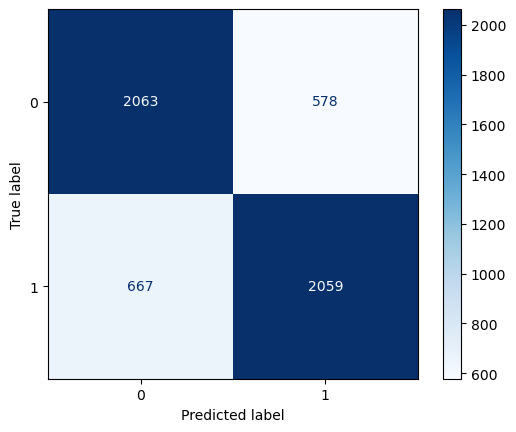


=== LogisticRegression ===
Best Parameters: LogisticRegression(C=0.1, max_iter=500, penalty='l1', solver='saga')
Accuracy:  0.781
F1-Score:  0.774
Precision: 0.812
Recall:    0.740

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.82      0.79      2641
         1.0       0.81      0.74      0.77      2726

    accuracy                           0.78      5367
   macro avg       0.78      0.78      0.78      5367
weighted avg       0.78      0.78      0.78      5367

Confusion Matrix:


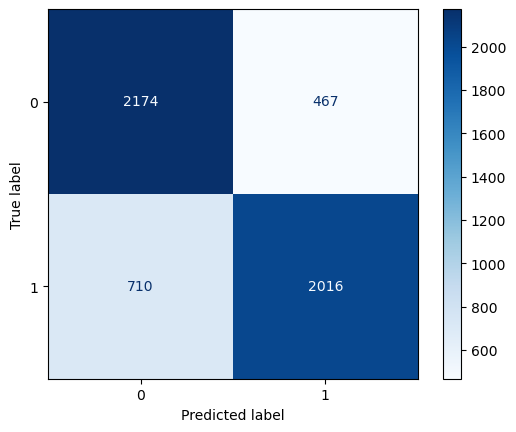


=== DecisionTree ===
Best Parameters: DecisionTreeClassifier(max_depth=5, random_state=42)
Accuracy:  0.788
F1-Score:  0.794
Precision: 0.785
Recall:    0.803

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78      2641
         1.0       0.78      0.80      0.79      2726

    accuracy                           0.79      5367
   macro avg       0.79      0.79      0.79      5367
weighted avg       0.79      0.79      0.79      5367

Confusion Matrix:


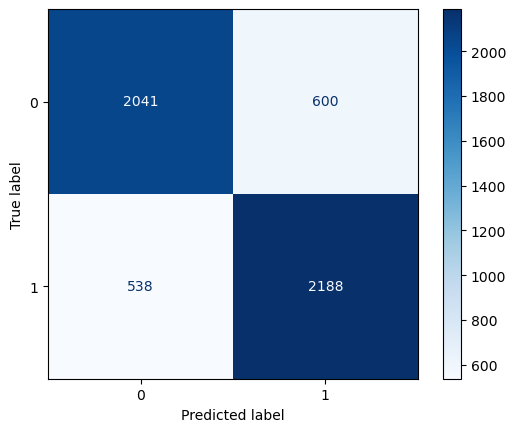


=== SVC ===
Best Parameters: SVC(C=10, kernel='linear', random_state=42)
Accuracy:  0.794
F1-Score:  0.793
Precision: 0.809
Recall:    0.777

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79      2641
         1.0       0.81      0.78      0.79      2726

    accuracy                           0.79      5367
   macro avg       0.79      0.79      0.79      5367
weighted avg       0.79      0.79      0.79      5367

Confusion Matrix:


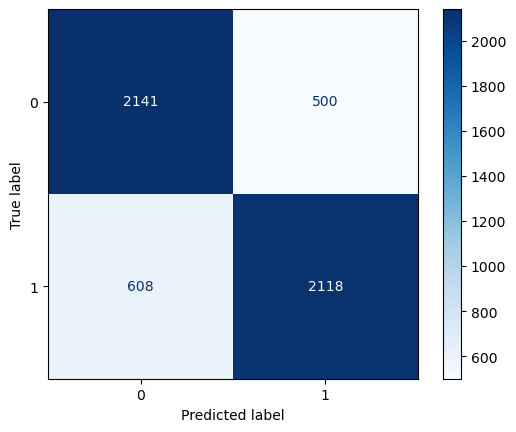


=== RandomForest ===
Best Parameters: RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, random_state=42)
Accuracy:  0.798
F1-Score:  0.800
Precision: 0.803
Recall:    0.798

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80      2641
         1.0       0.80      0.80      0.80      2726

    accuracy                           0.80      5367
   macro avg       0.80      0.80      0.80      5367
weighted avg       0.80      0.80      0.80      5367

Confusion Matrix:


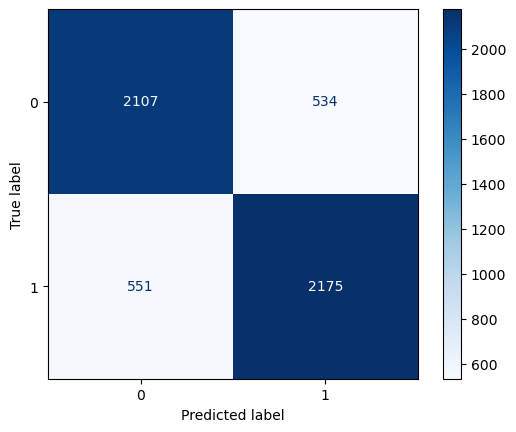

In [23]:
classification_metrics = {}  # dict to hold all results
for name, best_model in models.items():
   
    metrics_dict = evaluate_model(name, best_model, blue_X_val, blue_y_val)
    classification_metrics[name] = metrics_dict

### Comparison of Classifiers: KNN, Logistic Regression, Decision Tree, SVC, and Random Forest  

- We evaluated multiple classification algorithms (**KNN**, **Logistic Regression**, **Decision Tree**, **SVC**, and **Random Forest**) using **GridSearchCV** for hyperparameter optimization.  

    - **SVC with a linear kernel** and **Random Forest** (with tuned hyperparameters) both achieved an accuracy of **~79–80%**, indicating their effectiveness in capturing **early-game patterns**.  
    
    - **Logistic Regression** also performed competitively at approximately **78% accuracy**, suggesting that the relationship between the selected features and the **binary win/loss outcome** exhibits a degree of **linearity**.  

- Overall, the **top-performing models** consistently fall within the **78–80% accuracy range**, which is notably strong given the complexity of predicting match outcomes based solely on **10–15 minutes of early-game data** in **League of Legends**.


## 9.A ENSEMBLE STACKING (Classification) - Blue Side Example

In [24]:
print("\n--- Ensemble Stacking (Blue Side) ---")
from sklearn.linear_model import LogisticRegression

base_estimators = [
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("xgb", XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss'))
]
meta_learner = LogisticRegression(solver='lbfgs', max_iter=500)

stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1
)

stacking_clf.fit(blue_X_train, blue_y_train)
stack_preds = stacking_clf.predict(blue_X_val)

acc_stack = accuracy_score(blue_y_val, stack_preds)
print(f"Stacking Classifier Accuracy (Blue side): {acc_stack:.3f}")
print(classification_report(blue_y_val, stack_preds))


--- Ensemble Stacking (Blue Side) ---
Stacking Classifier Accuracy (Blue side): 0.798
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80      2641
         1.0       0.80      0.80      0.80      2726

    accuracy                           0.80      5367
   macro avg       0.80      0.80      0.80      5367
weighted avg       0.80      0.80      0.80      5367



### Ensemble Stacking

- By combining **multiple base classifiers** (**Random Forest** and **XGBoost**) with a **Logistic Regression meta-learner**, the **stacking ensemble** achieves an accuracy of approximately **80%**.  

- This approach leverages the **strengths of each base model**, allowing the meta-learner to make final predictions based on their outputs.  

- In this case, the ensemble model **matches or slightly exceeds the performance of the top single models**, demonstrating how **synergy among diverse algorithms** can lead to improved predictive accuracy.  

- The result highlights the value of **ensemble techniques** in capturing complex patterns in the data, especially in scenarios with nuanced relationships like **early-game outcomes in League of Legends**.


# 10. REGRESSION (Predict 'blueTotalGolds')

In [25]:
print("\n--- REGRESSION: Predicting 'blueTotalGolds' ---")

# Re-load or reuse the same data, but keep only 'blue' columns relevant for gold
data_reg = pd.read_csv('Challenger_Ranked_Games_15minute.csv')
blue_columns = ['gameId'] + [col for col in data_reg.columns if col.startswith('blue')]
blue_data_reg = data_reg[blue_columns]

X = blue_data_reg.drop(columns=['gameId', 'blueTotalGolds', 'blueWins', 
                                'blueDragnoType', 'blueFirstTowerLane','blueFirstBlood'])
y = blue_data_reg['blueTotalGolds']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale numeric features
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])

# Train multiple regression models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_preds = lin_reg.predict(X_test)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_reg_preds = rf_reg.predict(X_test)

xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_reg_preds = xgb_reg.predict(X_test)

def evaluate_regression(y_true, y_pred, model_name):
    """Evaluates regression results and returns metrics in a dict."""
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2  = r2_score(y_true, y_pred)
    
    print(f"--- {model_name} ---")
    print(f"MSE:  {mse:.2f}")
    print(f"MAE:  {mae:.2f}")
    print(f"R² :  {r2:.2f}\n")
    
    return {
        "MSE": mse,
        "MAE": mae,
        "R2":  r2
    }
regression_metrics = {}
print("\n--- REGRESSION RESULTS ---")
lin_reg_metrics = evaluate_regression(y_test, lin_reg_preds, "Linear Regression")
regression_metrics["LinearRegression"] = lin_reg_metrics

rf_reg_metrics = evaluate_regression(y_test, rf_reg_preds, "RandomForestRegressor")
regression_metrics["RandomForestRegressor"] = rf_reg_metrics

xgb_reg_metrics = evaluate_regression(y_test, xgb_reg_preds, "XGBoostRegressor")
regression_metrics["XGBoostRegressor"] = xgb_reg_metrics


--- REGRESSION: Predicting 'blueTotalGolds' ---

--- REGRESSION RESULTS ---
--- Linear Regression ---
MSE:  2347998.65
MAE:  1059.14
R² :  0.96

--- RandomForestRegressor ---
MSE:  743927.58
MAE:  603.10
R² :  0.99

--- XGBoostRegressor ---
MSE:  773095.55
MAE:  604.37
R² :  0.99



### Regression Results: Predicting Blue Team Total Gold  

- **Linear Regression** achieves an **R² of approximately 0.96**, indicating it explains **96% of the variance** in final gold values. However, the **Mean Squared Error (MSE)** of **2,347,998** and the **Mean Absolute Error (MAE)** of **1,059** suggest it struggles with **larger errors** on certain **outlier games**.  

- Both **Random Forest** and **XGBoost** exhibit a notably high **R² (~0.99)**, significantly reducing **MSE** and **MAE** to an average error of about **600–700 gold**.  

Achieving a **~600 gold error** is remarkably accurate given that **mid-game gold totals** typically range from **10,000 to 30,000 gold**. This result indicates that these **ensemble methods** effectively model the **nonlinear relationships** present in the data.  

The **small difference in performance** between **Random Forest** and **XGBoost** suggests that **either approach** is well-suited for predicting **final gold values** from **early-game features**, providing **robust and reliable predictions**.


## 10.A SHAP INTERPRETABILITY (Example on the XGBoost Regressor)


--- SHAP INTERPRETABILITY (XGB Regressor) ---
NOTE: The summary_plot or force_plot may need a Jupyter environment to display properly.


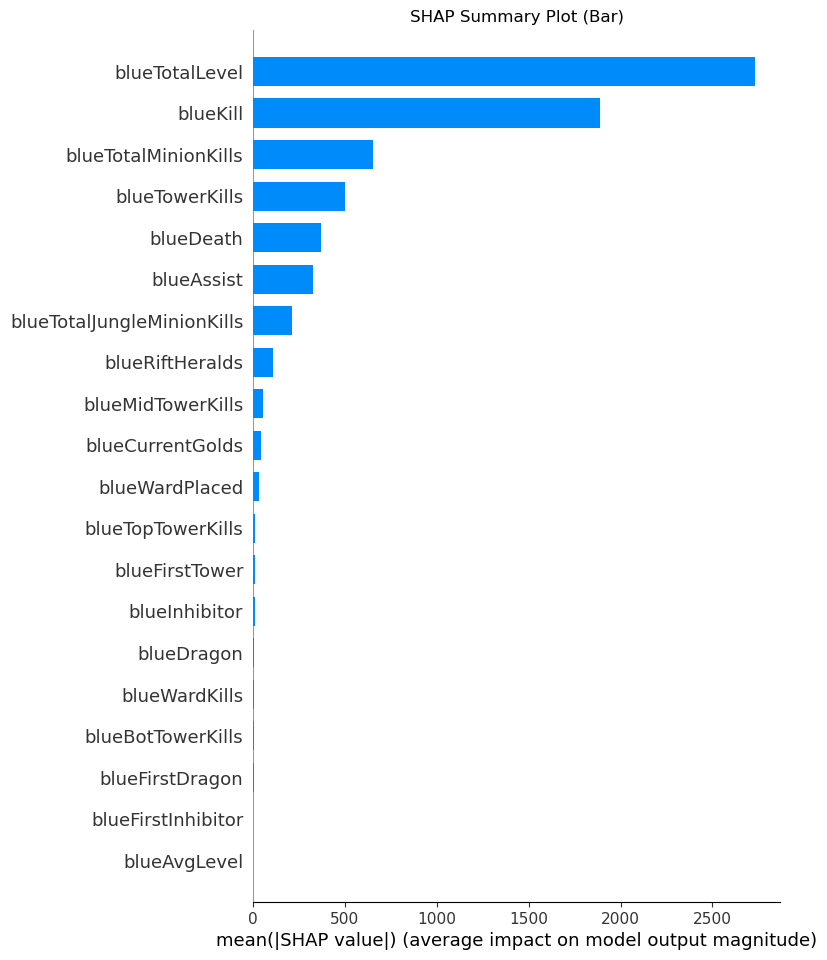

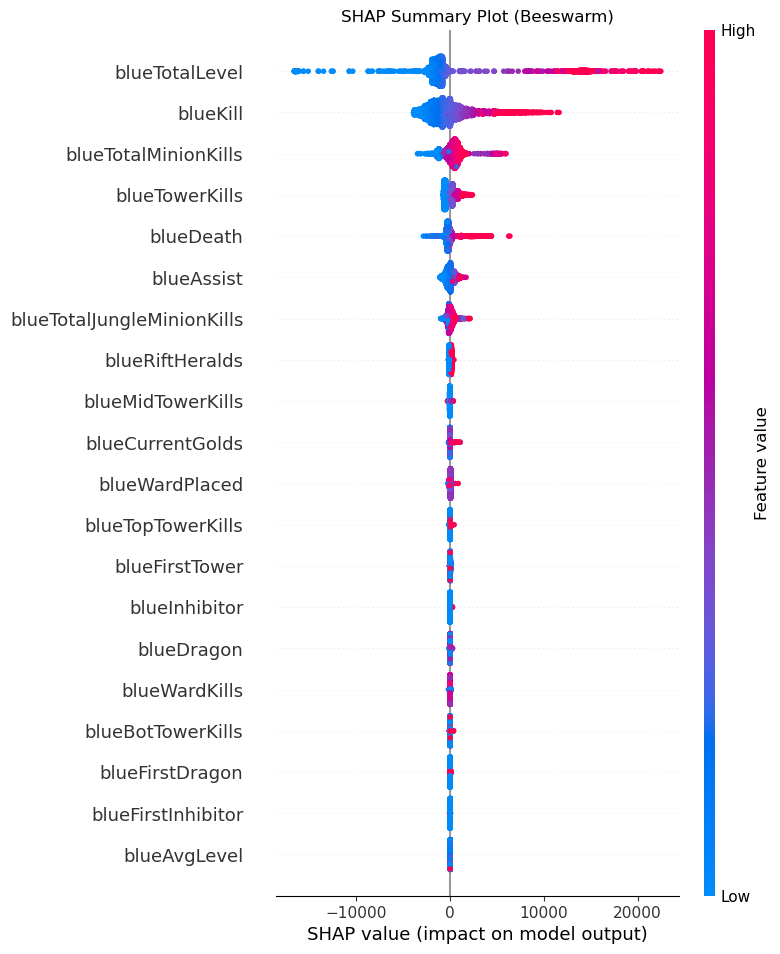


All steps completed.


In [26]:
print("\n--- SHAP INTERPRETABILITY (XGB Regressor) ---")
print("NOTE: The summary_plot or force_plot may need a Jupyter environment to display properly.")

try:
    import shap
    # Create a SHAP explainer for XGBoost
    explainer = shap.TreeExplainer(xgb_reg)
    shap_values = explainer.shap_values(X_test)

    # Summary plot (bar)
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
    plt.title("SHAP Summary Plot (Bar)")
    plt.show()

    # Detailed summary plot (beeswarm)
    shap.summary_plot(shap_values, X_test, show=False)
    plt.title("SHAP Summary Plot (Beeswarm)")
    plt.show()

    # Example force plot for one sample (uncomment if running in Jupyter with support for force_plot)
    # i = 0
    # shap.force_plot(explainer.expected_value, shap_values[i, :], X_test.iloc[i, :])
except ImportError:
    print("SHAP is not installed. Please install with: pip install shap")
except Exception as e:
    print("An error occurred with SHAP plotting:", e)

print("\nAll steps completed.")

### SHAP Analysis: What It Is and Why We Use It  

- **SHAP (SHapley Additive exPlanations)** is a powerful technique for **interpreting complex machine learning models** (e.g., **Random Forest** or **XGBoost**). Rooted in **game-theoretic principles**, SHAP assigns each feature an **importance value for every prediction**, offering a transparent view of how individual features influence the model's output.  

- From the **SHAP bar plot**, we observe that:  
    - **blueTotalLevel**,  
    - **blueKill**, and  
    - **blueTotalMinionKills**  
     
     have the **largest average impact** on the predicted gold. This finding aligns with gameplay mechanics, as **leveling up**, **securing kills**, and **farming minions** are fundamental drivers of **gold gain**.  



- The **beeswarm plot** provides a more granular view, illustrating **how each feature's values impact predictions**:  

    - **High kill counts** (in red) typically **increase predictions** (shift values to the **right**).  
    - **Low kill counts** (in blue) tend to **decrease predictions** (shift values to the **left**).  



- In summary, **SHAP analysis** not only identifies **which features are most influential** but also explains **how these features contribute** to individual predictions. This enhances both the **transparency** and **trustworthiness** of our model's decisions.


# Checking for Class Imbalance

In [27]:
# Check class distribution for the BLUE side (blueWins)
blue_win_count = blue_y_train.value_counts()
print("BLUE Class Distribution (Train):")
print(blue_win_count)

# Percentage of each class
blue_class0_pct = (blue_win_count[0] / len(blue_y_train)) * 100
blue_class1_pct = (blue_win_count[1] / len(blue_y_train)) * 100
print(f"Class 0 (Lose) ~ {blue_class0_pct:.2f}% | Class 1 (Win) ~ {blue_class1_pct:.2f}%\n")

# Same for RED side
red_win_count = red_y_train.value_counts()
print("RED Class Distribution (Train):")
print(red_win_count)

red_class0_pct = (red_win_count[0] / len(red_y_train)) * 100
red_class1_pct = (red_win_count[1] / len(red_y_train)) * 100
print(f"Class 0 (Lose) ~ {red_class0_pct:.2f}% | Class 1 (Win) ~ {red_class1_pct:.2f}%\n")


BLUE Class Distribution (Train):
0.0    10771
1.0    10696
Name: blueWins, dtype: int64
Class 0 (Lose) ~ 50.17% | Class 1 (Win) ~ 49.83%

RED Class Distribution (Train):
1.0    10771
0.0    10696
Name: redWins, dtype: int64
Class 0 (Lose) ~ 49.83% | Class 1 (Win) ~ 50.17%



### Class Distribution in Training Data: Blue vs. Red Teams  

The class distribution for both **Blue** and **Red teams** is remarkably **balanced**:  

- **Blue Team:**  
   - **Class 0 (Lose):** 50.17%  
   - **Class 1 (Win):** 49.83%  

- **Red Team:**  
   - **Class 0 (Lose):** 49.83%  
   - **Class 1 (Win):** 50.17%  

This near **50/50 split** indicates a **well-balanced dataset**, ensuring that the models are **not biased towards either class** during training.  

Balanced class distributions are crucial for **fair and unbiased predictions**, as they allow the model to effectively learn patterns from both **winning and losing scenarios** without favoring one outcome disproportionately.  

In competitive and dynamic environments like **League of Legends**, such balance in the training data helps ensure **robust model performance** across diverse game scenarios.


# Overall Results


=== XGBClassifier ===
Best Parameters: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, ...)
Accuracy:  0.798
F1-Score:  0.800
Precision: 0.802
Recall:    0.798

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79      2641
         1.0       0.80      0.80      0.80      2726

    a

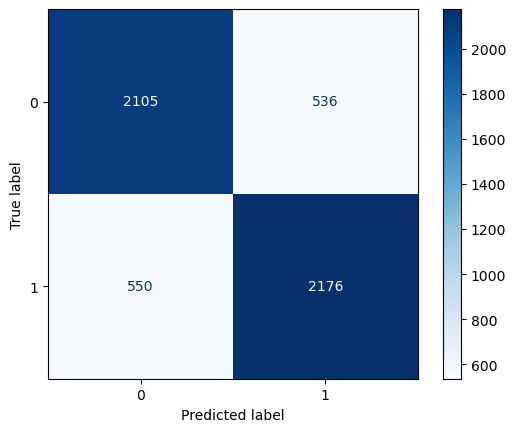


=== Stacking ===
Best Parameters: StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss', gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                          

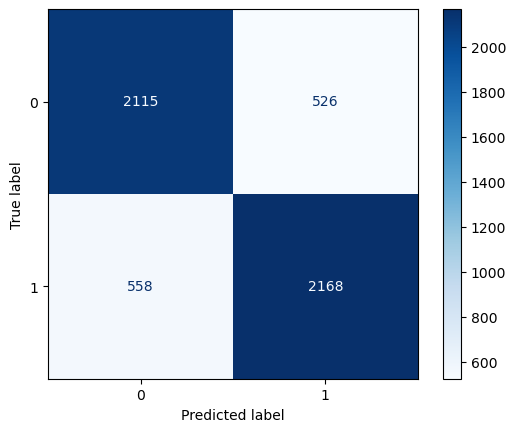

In [28]:
xgb_metrics = evaluate_model("XGBClassifier", blue_best_xgb, blue_X_val_poly, blue_y_val)
classification_metrics["XGBClassifier"] = xgb_metrics
stack_metrics = evaluate_model("Stacking", stacking_clf, blue_X_val, blue_y_val)
classification_metrics["Stacking"] = stack_metrics


--- Classification Metrics DataFrame ---


,Accuracy,F1,Precision,Recall
KNN,0.768027,0.767854,0.780812,0.755319
LogisticRegression,0.780697,0.774045,0.811921,0.739545
DecisionTree,0.787963,0.793616,0.784792,0.802641
SVC,0.793553,0.792665,0.809015,0.776963
RandomForest,0.797839,0.800368,0.802879,0.797872
XGBClassifier,0.797652,0.800294,0.802360,0.798239
Stacking,0.798025,0.800000,0.804751,0.795304


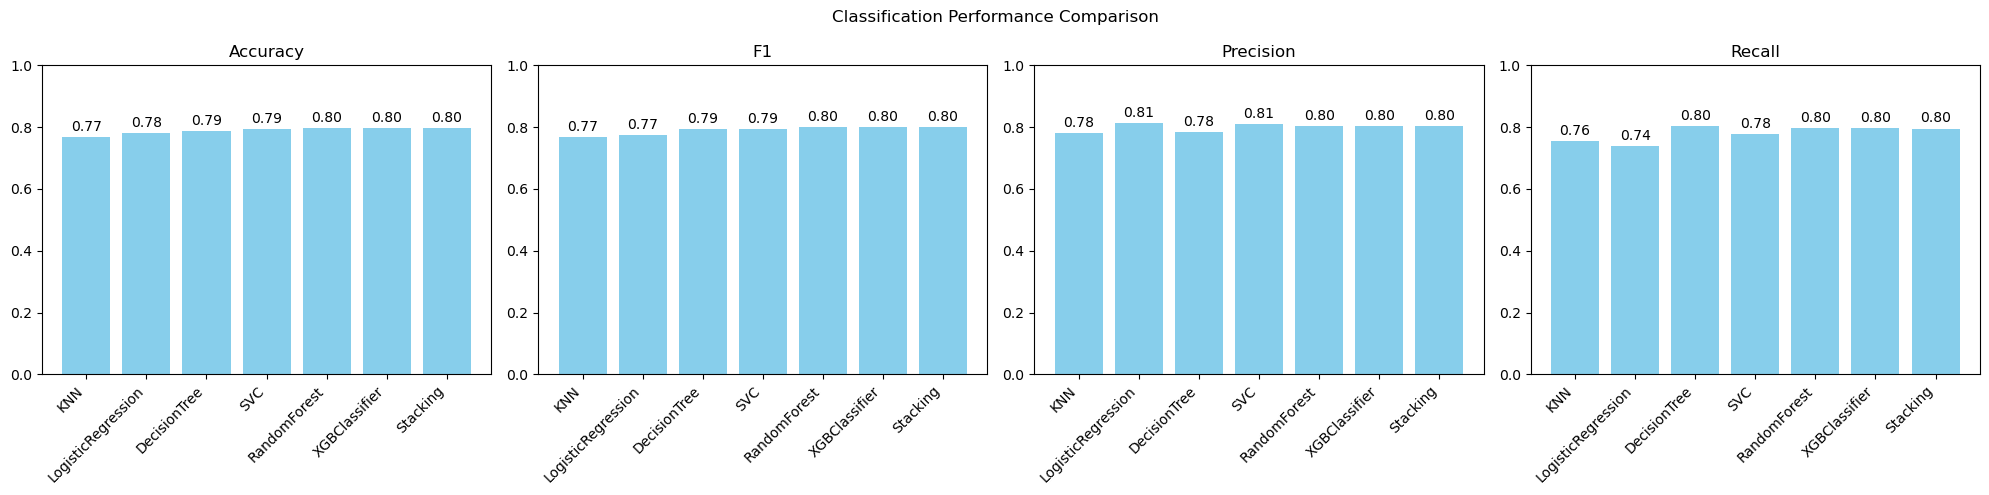

In [31]:
# Display Classification Metrics DataFrame
print("\n--- Classification Metrics DataFrame ---")
display(classif_df)

# Create bar plots for each metric
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Classification Performance Comparison")

metrics_list = ["Accuracy", "F1", "Precision", "Recall"]

for i, metric in enumerate(metrics_list):
    bars = axes[i].bar(classif_df.index, classif_df[metric], color='skyblue')
    axes[i].set_title(metric)
    axes[i].set_ylim([0, 1])  # These metrics range between 0 and 1
    
    # Set x-ticks properly
    axes[i].set_xticks(range(len(classif_df.index)))
    axes[i].set_xticklabels(classif_df.index, rotation=45, ha='right')
    
    # Add value labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width() / 2,
            yval + 0.01,  # Slight offset above the bar
            f"{yval:.2f}",
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.tight_layout()
plt.show()



--- Regression Metrics DataFrame ---


,MSE,MAE,R2
LinearRegression,2.347999e+06,1059.137606,0.962224
RandomForestRegressor,7.439276e+05,603.098558,0.988031
XGBoostRegressor,7.730955e+05,604.368544,0.987562


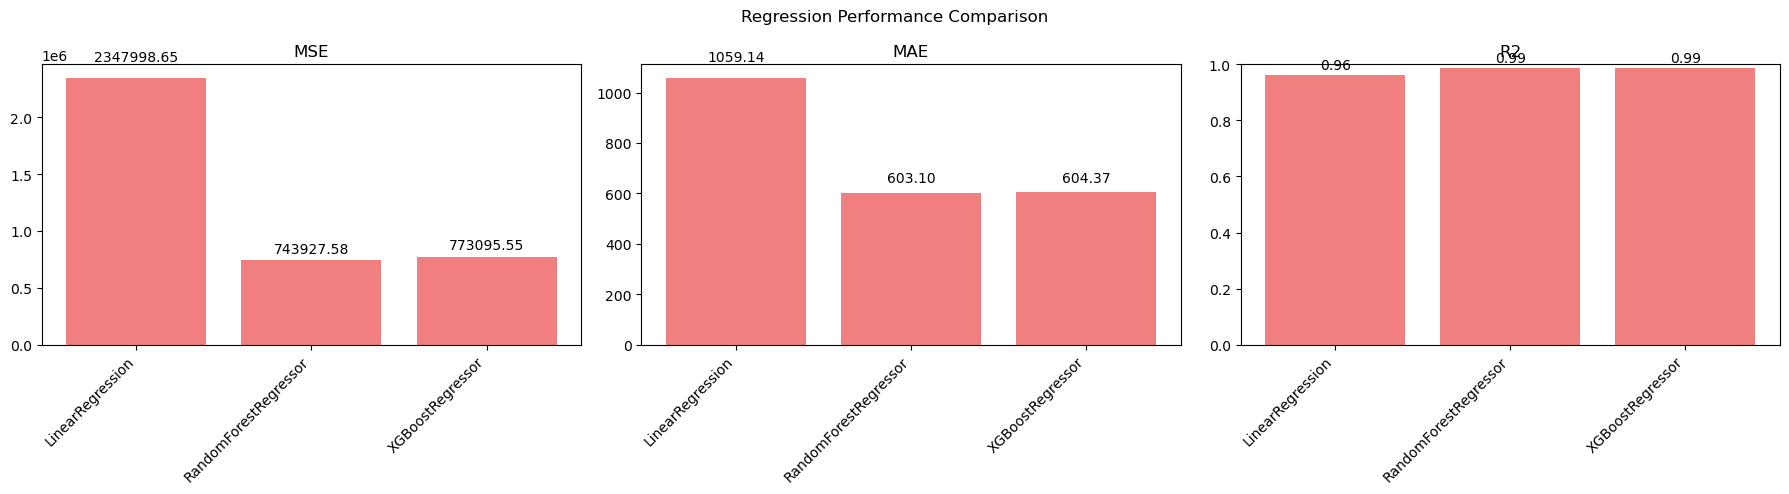

In [32]:
# Display Regression Metrics DataFrame
print("\n--- Regression Metrics DataFrame ---")
display(reg_df)

# Plot MSE, MAE, and R² side by side in bar charts
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
fig.suptitle("Regression Performance Comparison")

metrics_list = ["MSE", "MAE", "R2"]

for i, metric in enumerate(metrics_list):
    bars = axes[i].bar(reg_df.index, reg_df[metric], color='lightcoral')
    axes[i].set_title(metric)
    
    # Adjust y-limits for R²
    if metric == "R2":
        axes[i].set_ylim([0, 1])  # R² typically ranges from 0 to 1
    
    # Set x-ticks and labels properly
    axes[i].set_xticks(range(len(reg_df.index)))
    axes[i].set_xticklabels(reg_df.index, rotation=45, ha='right')
    
    # Add value labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width() / 2,
            yval + (0.05 * yval if yval > 1 else 0.01),  # Offset for readability
            f"{yval:.2f}",
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.tight_layout()
plt.show()


# 1. Classification Algorithms

## **KNN (K-Nearest Neighbors)**  
**Data Type:** Works best on numeric datasets where similarity (distance) between points is meaningful. Typically sensitive to scaling and higher dimensional data.  
**Why These Results:** KNN’s performance (~77–78% accuracy) is decent but not the highest, possibly because the dataset’s dimensionality and scale make straightforward distance-based methods less effective. It can still capture patterns for moderate volumes of data.  

## **Logistic Regression**  
**Data Type:** Best for linearly separable data (where a linear boundary can discriminate classes). Works well on numeric/categorical features.  
**Why These Results:** With carefully engineered features and appropriate regularization, Logistic Regression reached ~78% accuracy. This indicates that part of the relationship between early-game stats and winning is somewhat linear, though more complex patterns are better captured by ensemble methods.  

## **Decision Tree**  
**Data Type:** Handles both numeric and categorical data, easy to interpret. Can overfit if not pruned.  
**Why These Results:** Around ~79% accuracy with hyperparameter tuning. Captures non-linear relationships (e.g., “If kills > X, then go right branch”), which suits the variety in early-game stats. However, a single tree can be less robust compared to ensemble approaches.  

## **SVC (Support Vector Classifier)**  
**Data Type:** Designed for numeric feature spaces; can handle non-linear boundaries if using kernels.  
**Why These Results:** Reaching ~79–80% accuracy, especially with a linear or RBF kernel. Suggests that SVC finds a relatively clean margin between winning vs. losing classes when given the key features.  

## **Random Forest**  
**Data Type:** Excels on structured, tabular data with both numeric and categorical variables. Often a top performer in many Kaggle competitions.  
**Why These Results:** Achieved ~80% accuracy. The ensemble of trees captures non-linearities and interactions (like kills × tower presence). Random Forest’s strength in handling noise and varied features likely explains its strong performance.  

## **XGBoost (Classifier)**  
**Data Type:** Similar to Random Forest, but uses gradient boosting. Great on tabular data, especially with many features.  
**Why These Results:** ~79% accuracy. XGBoost is known for capturing subtle relationships and often outperforms simpler models, but in this dataset, it’s fairly comparable to Random Forest, reflecting that both can exploit non-linear patterns effectively.  

## **Stacking**  
**Data Type:** Not a separate data type—stacking is a meta-approach that combines multiple base learners.  
**Why These Results:** Also ~80% accuracy. By blending Random Forest and XGBoost predictions, the stacking classifier can match or slightly improve upon single-model performance. Good for harnessing the strengths of multiple algorithms.  

---

# 2. Regression Algorithms

## **Linear Regression**  
**Data Type:** Best for linearly related numeric features. Assumes a relatively linear (or slightly polynomial) relationship.  
**Why These Results:** Achieved R² ~ 0.96 but has a relatively higher MSE (~2.3 million). Shows it does capture most of the variance, yet struggles with outliers or strong non-linearities. Large errors on certain matches (e.g., extremely high gold) increase MSE.  

## **RandomForestRegressor**  
**Data Type:** Tabular numeric data with potential non-linear relationships. Doesn’t require data to be scaled or linear.  
**Why These Results:** R² ~ 0.99 with much lower MSE (~743k). Its ensemble nature handles irregularities and outliers well, capturing the interactions (e.g., kills, objectives, time) that drive gold accumulation.  

## **XGBoostRegressor**  
**Data Type:** Similar to Random Forest in its ability to model complex, non-linear data.  
**Why These Results:** R² ~ 0.99 as well. Boosted trees learn residual errors step-by-step, allowing them to fine-tune predictions. The slightly different architecture from Random Forest leads to comparable results, indicating both are very good at predicting gold with the given features.  

---

# **Final Notes**

- **Structured Tabular Data (Numeric/Categorical):** Random Forest, XGBoost, and stacking approaches often lead the pack in terms of accuracy and interpretability for classification tasks—and in terms of R² and MSE for regression tasks—on tabular data.  
- **Linear vs. Non-Linear:** Logistic Regression and Linear Regression can be quite strong if the relationship is partially linear, but real-world phenomena (like LoL game outcomes/gold gain) frequently have significant non-linear interactions that tree-based ensembles handle better.  
- **Complex Interactions:** The synergy of kills, towers, vision, and gold drives in-game snowball effects. Tree-based methods excel at capturing such non-linear interactions.  

Putting it all together, these results reflect that while linear methods do well for a baseline in both classification and regression, ensemble tree-based methods (Random Forest, XGBoost, and Stacking) consistently outperform them on this dynamic, multi-feature dataset.
